In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0.4707344358456376

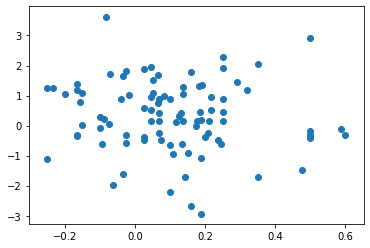

In [190]:
data = pd.read_csv('data/quote_listed_articles.csv')

data_sample = pd.DataFrame.sample(data, 90)

data_sample.corr()
plt.scatter(data_sample["polarity"], data_sample["percentage_change"])


import scipy.stats as ss

# https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

confusion_matrix = pd.crosstab(data_sample["polarity"], data_sample["percentage_change"]).as_matrix()
cramers_v(confusion_matrix)


In [191]:
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()

article_summary = 'Japan Display Inc will begin to supply organic light-emitting diode (OLED) screens for the Apple Watch later this year, two sources said, a breakthrough for the cash-strapped company whose late shift to OLED has cost it orders from Apple.'
displacy.render(nlp(article_summary), jupyter=True, style='ent')


In [192]:
# Performing name entity recognition (NER)
def perform_ner(data):
    nlp = en_core_web_sm.load()
    doc = nlp(data)
    label_data = [(X.text, X.label_) for X in doc.ents]
    return label_data

print(perform_ner(article_summary))


[('Japan Display Inc', 'ORG'), ('Apple Watch', 'ORG'), ('later this year', 'DATE'), ('two', 'CARDINAL'), ('Apple', 'ORG')]


In [68]:
displacy.render(nlp(article_summary), style= 'dep', jupyter= True, options= {'distance': 100})


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


0.35254754676109884

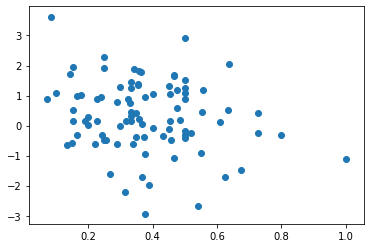

In [193]:
plt.scatter(data_sample["subjectivity"], data_sample["percentage_change"])

confusion_matrix = pd.crosstab(data_sample["subjectivity"], data_sample["percentage_change"]).as_matrix()
cramers_v(confusion_matrix)



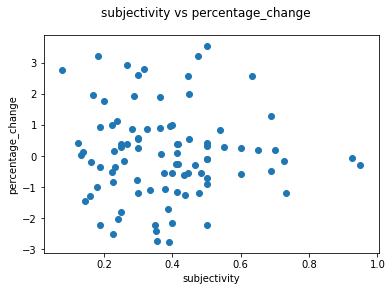

In [96]:
fig = plt.figure()
plt.scatter(data_sample["subjectivity"], data_sample["percentage_change"])
fig.suptitle('subjectivity vs percentage_change')
plt.xlabel('subjectivity')
plt.ylabel('percentage_change')
fig.savefig('subjectivity-percentagechange.png')

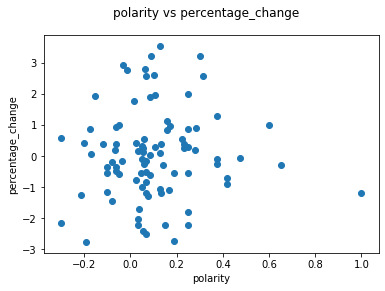

In [97]:
fig = plt.figure()
plt.scatter(data_sample["polarity"], data_sample["percentage_change"])
fig.suptitle('polarity vs percentage_change')
plt.xlabel('polarity')
plt.ylabel('percentage_change')
fig.savefig('polarity-percentagechange.png')

In [105]:
data_sample.corr(method='pearson')

,polarity,subjectivity,open_quote,close_quote,percentage_change
polarity,1.000000,0.325655,0.015304,0.015121,0.044053
subjectivity,0.325655,1.000000,-0.133473,-0.133596,-0.023786
open_quote,0.015304,-0.133473,1.000000,0.999998,0.140803
close_quote,0.015121,-0.133596,0.999998,1.000000,0.141343
percentage_change,0.044053,-0.023786,0.140803,0.141343,1.000000


In [194]:
confusion_matrix = pd.crosstab(data_sample["sentiment"], data_sample["movement"]).as_matrix()

cramers_v(confusion_matrix)



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.0

In [195]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing

# Initialise the Scaler 
scaler = StandardScaler() 

X_train = [data["polarity"], data["percentage_change"]]

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

from pandas import DataFrame

Cars = {'polarity':X_train_minmax[0],
        'change':X_train_minmax[1]
        }

df = DataFrame(Cars, columns= ['polarity', 'change'])

export_csv = df.to_csv (r'fit_data_minmax.csv', index = None, header=True)



          polarity  change
polarity       1.0    -1.0
change        -1.0     1.0


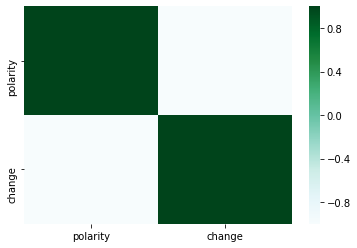

In [196]:
import seaborn as sns
data = pd.read_csv('fit_data_minmax.csv')
data_sample_minmax = pd.DataFrame.sample(data, 100)
print(data_sample_minmax.corr())
sns.heatmap(data_sample_minmax.corr(), cmap='BuGn')

In [239]:
quantile_transformer = preprocessing.QuantileTransformer(
    output_distribution='normal', random_state=0)
X_trans = quantile_transformer.fit_transform(X_train)
quantile_transformer.quantiles_ 

from pandas import DataFrame

Cars = {'polarity':quantile_transformer.quantiles_[0],
        'change':quantile_transformer.quantiles_ [1]
        }

df = DataFrame(Cars, columns= ['polarity', 'change'])

export_csv = df.to_csv (r'fit_data_quan.csv', index = None, header=True)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (2). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


          polarity    change
polarity  1.000000  0.680602
change    0.680602  1.000000


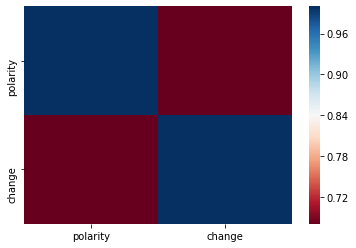

In [20]:
import seaborn as sns
data = pd.read_csv('fit_data_quan.csv')
data_sample = pd.DataFrame.sample(data, 100)
print(data_sample.corr('spearman'))
sns.heatmap(data_sample.corr(method='spearman'), cmap='RdBu')

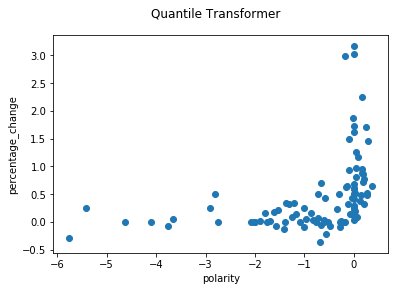

In [26]:
fig = plt.figure()
data_sample = pd.DataFrame.sample(data, 100)
plt.scatter(data_sample["polarity"], data_sample["change"])
fig.suptitle('Quantile Transformer')
plt.xlabel('polarity')
plt.ylabel('percentage_change')
fig.savefig('polarity-percentage_change.png', format = 'png', dpi=1200)

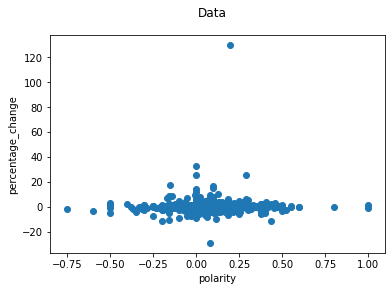

In [29]:
data = pd.read_csv('data/quote_listed_articles.csv')
fi = plt.figure()
data_sample = pd.DataFrame.sample(data, 1000)
plt.scatter(data_sample["polarity"], data_sample["percentage_change"])
fi.suptitle('Data')
plt.xlabel('polarity')
plt.ylabel('percentage_change')
fi.savefig('polarity_change.png', format = 'png', dpi=1200)

In [203]:
X_normalized = preprocessing.normalize(X_train, norm='l2')

from pandas import DataFrame

Cars = {'polarity':X_normalized[0],
        'change':X_normalized[1]
        }

df = DataFrame(Cars, columns= ['polarity', 'change'])

export_csv = df.to_csv (r'fit_data_normalization.csv', index = None, header=True)

          polarity    change
polarity  1.000000  0.022151
change    0.022151  1.000000


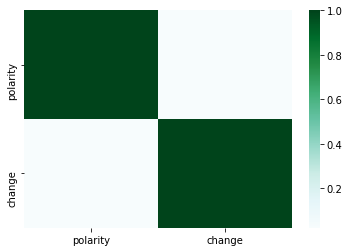

In [221]:
data_nor = pd.read_csv('fit_data_normalization.csv')
data_sampl_nor = pd.DataFrame.sample(data_nor, 1000)
print(data_sampl_nor.corr())
sns.heatmap(data_sampl_nor.corr(), cmap='BuGn')

In [225]:
data_sampl_nor.corr(method='spearman')

,polarity,change
polarity,1.000000,0.008929
change,0.008929,1.000000


In [210]:
from textblob import TextBlob
import re

def clean_article(article):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", article).split())

analysis = TextBlob(clean_article(article_summary))
print(analysis.sentiment)

Sentiment(polarity=-0.15, subjectivity=0.3)


In [245]:
data_sample.corr(method='kendall')

,polarity,change
polarity,1.000000,0.483486
change,0.483486,1.000000


In [246]:
data_sample.corr(method='pearson')

,polarity,change
polarity,1.000000,0.478102
change,0.478102,1.000000


In [ ]:
data_sample.corr(method='spearman')

In [215]:
from statistics import mean, stdev
from math import sqrt

# test conditions
c0 = data_sample["polarity"]
c1 = data_sample["change"]

cohens_d = (mean(c0) - mean(c1)) / (sqrt((stdev(c0) ** 2 + stdev(c1) ** 2) / 2))

print(cohens_d)

-1.3870070291662644


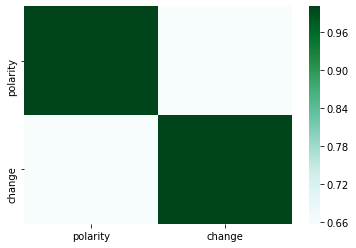

In [216]:
sns.heatmap(data_sample.corr(method='spearman'), cmap='BuGn')

In [230]:
# calculate the spearman's correlation between two variables
from scipy.stats import spearmanr
# prepare data
data1 = data_sample["polarity"]
data2 = data_sample["change"]
# calculate spearman's correlation
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
print(p)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.648
3.20135823077835e-13
Samples are correlated (reject H0) p=0.000
